In [1]:
import numpy as np
import pandas as pd
import imblearn
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE

C:\Users\kdagi\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df = pd.read_csv('shortCICDDoS2019.csv')
df.head()

C:\Users\kdagi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,2323886,11697,172.16.0.5-192.168.50.1-900-21222-17,172.16.0.5,900,192.168.50.1,21222,17,2018-12-01 11:27:31.415715,49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
1,4535861,218920,172.16.0.5-192.168.50.1-61405-48244-6,172.16.0.5,61405,192.168.50.1,48244,6,2018-12-01 13:33:18.865758,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn
2,672030,4387,172.16.0.5-192.168.50.1-557-35921-17,172.16.0.5,557,192.168.50.1,35921,17,2018-12-01 10:40:44.164579,436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_NTP
3,3855490,670514,172.16.0.5-192.168.50.1-55413-50260-6,172.16.0.5,55413,192.168.50.1,50260,6,2018-12-01 13:31:38.130611,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn
4,3195907,29861,172.16.0.5-192.168.50.1-760-4843-17,172.16.0.5,760,192.168.50.1,4843,17,2018-12-01 11:31:32.548922,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP


In [7]:
df[" Label"].value_counts()

DrDoS_LDAP    407163
Syn           295717
DrDoS_NTP     224841
UDP-lag        68546
BENIGN          3654
WebDDoS           79
Name:  Label, dtype: int64

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', 

In [13]:
def targetify(s):
    if s == 'BENIGN':
        return 0
    else:
        return 1

In [14]:
df['target']=df[' Label'].apply(targetify)

Class 0: 3654
Class 1: 996346
Proportion: 0.0 : 1


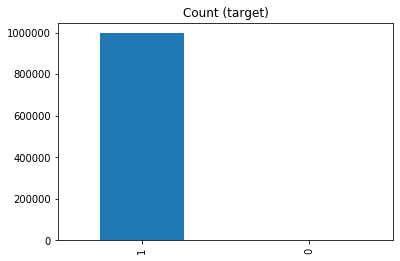

In [15]:
target_count = df.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [16]:
features = ['Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count',
       ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count',
       ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio',
       ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk',
       ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk',
       ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',
       ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean',
       ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std',
       ' Idle Max', ' Idle Min', 'SimillarHTTP', ' Inbound', ' Label']

In [17]:
X = df[features]
X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)

In [18]:
y = df['target']

In [19]:
X = X.fillna(0)

In [20]:
# Class count
count_class_0, count_class_1 = df.target.value_counts()

# Divide by class
df_class_0 = df[df['target'] == 0]
df_class_1 = df[df['target'] == 1]

Random over-sampling:
1    996346
0    996346
Name: target, dtype: int64


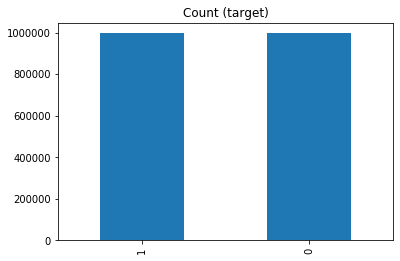

In [21]:
df_class_0_over = df_class_0.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_1, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)');

In [23]:
df[" Label"].value_counts()

DrDoS_LDAP    407163
Syn           295717
DrDoS_NTP     224841
UDP-lag        68546
BENIGN          3654
WebDDoS           79
Name:  Label, dtype: int64

In [24]:
df_test_over[" Label"].value_counts()

BENIGN        996346
DrDoS_LDAP    407163
Syn           295717
DrDoS_NTP     224841
UDP-lag        68546
WebDDoS           79
Name:  Label, dtype: int64

In [25]:
df = df_test_over.sample(frac=1)

In [26]:
df.head(1000000).to_csv('short_oversampled_CICDDoS2019.csv')

In [27]:
dfs = pd.read_csv('short_oversampled_CICDDoS2019.csv')
dfs.head()
dfs[" Label"].value_counts()

BENIGN        500153
DrDoS_LDAP    204119
Syn           148501
DrDoS_NTP     112981
UDP-lag        34212
WebDDoS           34
Name:  Label, dtype: int64